In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

import sklearn
from sklearn import datasets
#loading dataset
dataset = sklearn.datasets.load_breast_cancer()

In [3]:
#converting the dataset to dataframe
df = pd.DataFrame(data= dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
X = df.drop('target' , axis = 1)
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)


In [7]:
X_train.shape

(426, 30)

In [8]:
import keras
import tensorflow as tf


2025-07-30 17:28:25.740609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753896505.964215      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753896506.026365      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
Model = keras.models.Sequential([
            keras.layers.Input(shape=(30,)),
            keras.layers.Dense(128 , activation = 'relu'),          
            keras.layers.Dense(265 , activation = 'relu'),
            keras.layers.Dense(64 , activation = 'relu'),          
            keras.layers.Dense(64 , activation = 'relu'),
            keras.layers.Dense(1 , activation = 'sigmoid')   
])

2025-07-30 17:28:39.702597: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
from tensorflow.keras.optimizers import AdamW

myoptimizer = AdamW(
    learning_rate=0.01,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="AdamW"
)

In [11]:
Model.compile(optimizer = myoptimizer , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [12]:
history = Model.fit(X_train ,y_train , validation_data= (X_test , y_test) , epochs = 300 , batch_size=100 , verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4685 - loss: 109.2332 - val_accuracy: 0.3776 - val_loss: 17.7304
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4741 - loss: 15.3259 - val_accuracy: 0.6224 - val_loss: 8.6793
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5801 - loss: 5.0712 - val_accuracy: 0.3776 - val_loss: 1.1205
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4954 - loss: 3.2358 - val_accuracy: 0.3776 - val_loss: 1.8553
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4176 - loss: 1.7514 - val_accuracy: 0.6224 - val_loss: 1.3000
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6173 - loss: 0.9628 - val_accuracy: 0.7622 - val_loss: 0.4699
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7549 - loss: 0.5024 - val_accuracy: 0.8252 - val_loss: 0.4412
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8024 - loss: 0.4569 - val_accuracy: 0.9021 - val_

In [13]:
y_pred = Model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [14]:
y_pred = (y_pred > 0.5).astype(int)

In [15]:
print(y_pred[10:20])
print(y_test[10:20])

[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
457    1
167    0
165    1
329    0
527    1
83     0
511    1
556    1
101    1
535    0
Name: target, dtype: int64


In [16]:
ModelLoss , ModelAccuracy  = Model.evaluate(X_test, y_test)
print("model loss {}".format(ModelLoss))
print("model accuracy {}".format(ModelAccuracy))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9473 - loss: 0.2231 
model loss 0.23488478362560272
model accuracy 0.9370629191398621


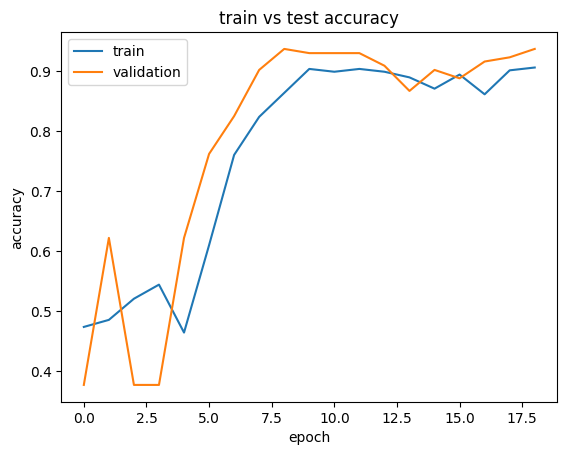

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('train vs test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


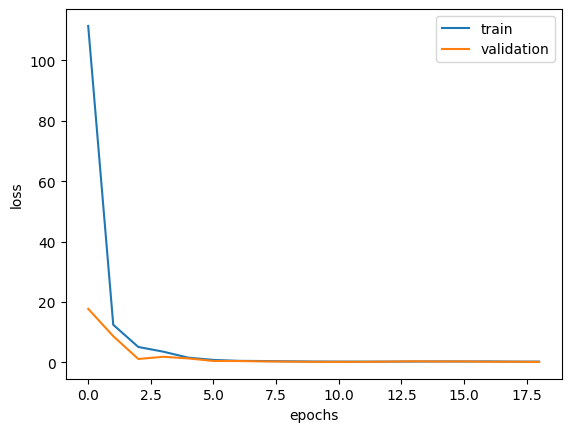

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'validation'] , loc = 'upper right')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test , y_pred)
print('the consusion matrix : \n', CM )

the consusion matrix : 
 [[46  8]
 [ 1 88]]


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


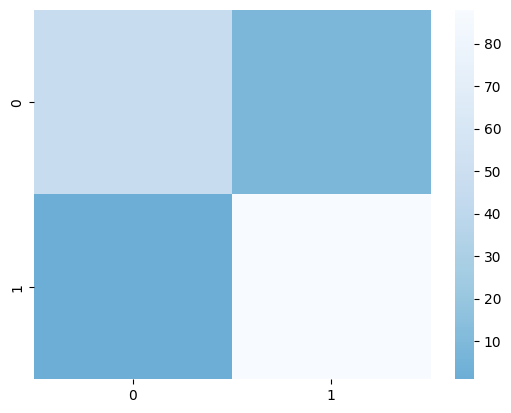

In [20]:
import seaborn as sns

sns.heatmap(CM , center = True , cmap='Blues_r')
plt.show()

In [21]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test , y_pred)
print('classification report \n' , ClassificationReport)

classification report 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91        54
           1       0.92      0.99      0.95        89

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

